<center> <h2>CAR ACCIDENT SEVERITY </h2>  
<center> <h3>IBM Data Science Specialization – Capstone Project</h3> 

<span style="color:Darkblue">**Introduction/Business Problem**</span>   

The goal of this project is to predict the severity of a traffic accident. Car accidents are undesirable and dangerous for all traffic participants. Information about road conditions and possibility of one getting into car accident and its intensity could be signal for changing a traffic route. This, along with driving safely at all time, could save many lives caused by traffic disasters. Therefore, prediction of traffic accident severity is one of the main things that improve traffic management process. Since car accidents are unexpected, recognition of most important influences might be a substantial key for improving traffic safety. Said that, it is obvious that WHS consultant, facilitators, traffic consultants, safety officers and other people involved in traffic management process might find this kind of project quite useful.



<span style="color:Darkblue">**Data - Preprocessing, Explanatory and Features Selection**</span>   

Data used in this project are data about trafic collisions recorded in Seattle area. All data are provided by Seattle Police Department and recorded by SDOT Traffic Management Division, Traffic Records Group since 2004. Data could be downloaded at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 
In total, there are 37 attributes. Target of the data is severity which describes the fatality of an accident (variable SEVERITYCODE). While reviewing data in order to choose potential features set, fields of long unique descriptions, fields representing unique ID data related to the recordings of the police or some other institution and data that are recorded after collision happened are disregarded. Data that might contribute to determining accident severity might include collision address type (ADDRTYPE), date and time (INCDTTM), category of junction (JUNCTIONTYPE), whether or not a driver involved is under the influence of drugs or alcohol (UNDERINFL), weather conditions (WEATHER), condition of the road (ROADCOND) and light conditions (LIGHTCOND). 


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import pylab as pl
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy.optimize as opt
import seaborn as sns
%matplotlib inline


In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-09 10:50:11--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  18.2MB/s    in 4.2s    

2020-09-09 10:50:16 (16.9 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
data_df = pd.read_csv (r'Data-Collisions.csv')
data_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
data_df.shape

(194673, 38)

In [5]:
data_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
data_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
data_temp_df=data_df[['SEVERITYCODE','X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','ADDRTYPE',
               'LOCATION','SEVERITYCODE.1','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT',
               'PEDCYLCOUNT','VEHCOUNT','INCDATE','INCDTTM','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC',
               'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE','ST_COLDESC', 'SEGLANEKEY',
               'CROSSWALKKEY','HITPARKEDCAR']]

In [8]:
data_temp_df.isna().sum()

SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE          1926
LOCATION          2677
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
SDOT_COLDESC         0
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

In [9]:
data_temp_df = data_temp_df.dropna()

In [10]:
data_temp_df.shape

(180067, 31)

Address type include two values – Block (0) and Intersection (1). Variable about date and time of recorded collision (INCDTTM) are transformed into two additional variables ‘HOUR’ and ‘DAYOFWEEK’. Someone might find this strange, but there are there are no more accidents during the weekend, numbers but almost uniformly spread through the whole week. Additional information could be found with ‘HOUR’ variable since there are evidently more accidents during some hours (around midnight and rush hours) than the others (around 5-6 am), even though there are no distinctiveness between severity of an accident. So, added variable ‘HOUR’ is transformed into 3 groups as following: 1 – time (hours) of low risk of collision, 2 – time of moderate risk of collision, 3 – time of high risk of collision. We are looking at the rest of the potential features set and doing transformation when needed.


In [11]:
data_temp_df['ADDRTYPE'].value_counts()

Block           117085
Intersection     62982
Name: ADDRTYPE, dtype: int64

In [12]:
data_temp_df['ADDRTYPE'].replace(to_replace=['Block','Intersection'], value=[0,1],inplace=True)
data_temp_df['ADDRTYPE'].value_counts()

0    117085
1     62982
Name: ADDRTYPE, dtype: int64

<span style="color:Blue">'ADDRTYPE':  0 - Block, 1 - Intersection. </span>   

In [127]:
data_temp_df['INCDTTM'] = pd.to_datetime(data_temp_df['INCDTTM'])
data_temp_df['hour'] = data_temp_df['INCDTTM'].dt.hour
data_temp_df['dayofweek'] = data_temp_df['INCDTTM'].dt.dayofweek

In [128]:
data_temp_df['INCDTTM'].head()

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
Name: INCDTTM, dtype: datetime64[ns]

In [129]:
data_temp_df['dayofweek'].value_counts()

4    29860
3    27075
2    26578
1    26353
5    25555
0    24212
6    20434
Name: dayofweek, dtype: int64

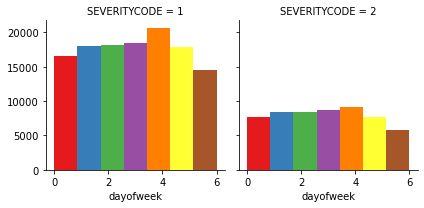

In [16]:
bins = np.linspace(data_temp_df['dayofweek'].min(), data_temp_df['dayofweek'].max(), 8)
g = sns.FacetGrid(data_temp_df, col='SEVERITYCODE', hue='dayofweek', palette="Set1", sharex=True, sharey=True, col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins)
plt.show()


In [130]:
data_temp_df['hour'].value_counts()

0     28222
17    12328
16    11575
15    10938
14    10179
13     9783
12     9757
18     9210
8      8100
11     7798
9      7616
10     7035
19     6831
7      6216
20     5867
21     5290
22     5158
23     4302
2      3382
1      3224
6      3013
5      1547
3      1546
4      1150
Name: hour, dtype: int64

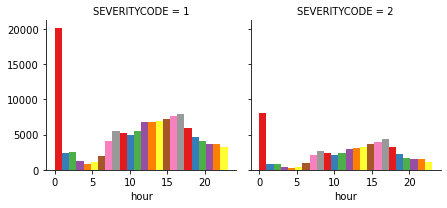

In [124]:
bins = np.linspace(data_temp_df['hour'].min(), data_temp_df['hour'].max(), 25)
g = sns.FacetGrid(data_temp_df, col='SEVERITYCODE', hue='hour', palette="Set1", sharex=True, sharey=True, col_wrap=4)
g.map(plt.hist, 'hour', bins=bins)
plt.show()


In [131]:
data_temp_df['hour'] = data_temp_df['hour'].replace([0,12,13,14,15,16,17,18,7,8,9,10,11,19,20,21,22,23,1,2,3,4,5,6],[3,3,3,3,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1])

In [132]:
data_temp_df['hour'].value_counts()

2    76709
3    68879
1    34479
Name: hour, dtype: int64

<span style="color:Blue">'hour':  1 - Low risk, 2 - Moderate risk, 3 - High risk. </span>  

In [21]:
data_temp_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              84513
At Intersection (intersection related)               60915
Mid-Block (but intersection related)                 22035
Driveway Junction                                    10430
At Intersection (but not related to intersection)     2030
Ramp Junction                                          139
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [22]:
data_temp_df['JUNCTIONTYPE'].replace(to_replace=['Unknown','Ramp Junction','At Intersection (but not related to intersection)','Driveway Junction','Mid-Block (but intersection related)','At Intersection (intersection related)','Mid-Block (not related to intersection)'], value=[1,1,2,3,4,5,6],inplace=True)
data_temp_df['JUNCTIONTYPE'].value_counts()

6    84513
5    60915
4    22035
3    10430
2     2030
1      144
Name: JUNCTIONTYPE, dtype: int64

In [23]:
data_temp_df['UNDERINFL'].value_counts()

N    93736
0    77514
Y     4939
1     3878
Name: UNDERINFL, dtype: int64

In [24]:
data_temp_df['UNDERINFL'].replace(to_replace=['N','Y',0,1], value=[0,1,0,1],inplace=True)
data_temp_df['UNDERINFL'].value_counts()

0    93736
0    77514
1     4939
1     3878
Name: UNDERINFL, dtype: int64

In [25]:
data_temp_df['UNDERINFL'] = pd.to_numeric(data_temp_df['UNDERINFL'])
data_temp_df['UNDERINFL'].value_counts()

0    171250
1      8817
Name: UNDERINFL, dtype: int64

In [26]:
data_temp_df['WEATHER'].value_counts()

Clear                       107692
Raining                      31719
Overcast                     26809
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [27]:
data_temp_df['WEATHER'].replace(to_replace=['Clear','Unknown','Other','Partly Cloudy','Overcast','Severe Crosswind','Raining','Snowing','Blowing Sand/Dirt','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain'], value=[0,1,1,2,3,4,5,6,7,8,9],inplace=True)
data_temp_df['WEATHER'].value_counts()

0    107692
5     31719
3     26809
1     12233
6       875
8       549
9       112
7        49
4        24
2         5
Name: WEATHER, dtype: int64

In [28]:
data_temp_df['ROADCOND'].value_counts()

Dry               120629
Wet                45597
Unknown            11384
Ice                 1161
Snow/Slush           971
Other                115
Standing Water        99
Sand/Mud/Dirt         62
Oil                   49
Name: ROADCOND, dtype: int64

In [29]:
data_temp_df['ROADCOND'].replace(to_replace=['Dry','Unknown','Other','Sand/Mud/Dirt','Standing Water','Snow/Slush','Wet','Oil','Ice'], value=[0,1,1,2,3,4,5,6,7],inplace=True)
data_temp_df['ROADCOND'].value_counts()

0    120629
5     45597
1     11499
7      1161
4       971
3        99
2        62
6        49
Name: ROADCOND, dtype: int64

In [30]:
data_temp_df['LIGHTCOND'].value_counts()

Daylight                    112216
Dark - Street Lights On      46683
Unknown                      10340
Dusk                          5708
Dawn                          2389
Dark - No Street Lights       1418
Dark - Street Lights Off      1130
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [31]:
data_temp_df['LIGHTCOND'].replace(to_replace=['Daylight','Unknown','Other','Dawn','Dusk','Dark - Street Lights On','Dark - Unknown Lighting','Dark - Street Lights Off','Dark - No Street Lights'], value=[0,1,1,2,3,4,5,6,6],inplace=True)
data_temp_df['LIGHTCOND'].value_counts()

0    112216
4     46683
1     10512
3      5708
6      2548
2      2389
5        11
Name: LIGHTCOND, dtype: int64

Variables 'ADDRTYPE' and 'JUNCTIONTYPE'  both represent category of junction at which collision took place, so there is no reason to use both variables in features set. Since 'JUNCTIONTYPE' represents more complex division, this variable could add more information to the model.

Let's see our features set X

In [133]:
X = data_temp_df[['hour','UNDERINFL','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]

In [134]:
X.dtypes

hour            int64
UNDERINFL       int64
JUNCTIONTYPE    int64
WEATHER         int64
ROADCOND        int64
LIGHTCOND       int64
dtype: object

In [135]:
des = pd.read_excel (r'featuresX.xlsx', header=1)

In [136]:
des = des.replace(np.nan, '', regex=True)

In [137]:
des.style.hide_index()

FEATURE,VALUE,DESCRIPTION
hour,1,Time/Hour of Low Risk of Collision
,2,Time/Hour of Moderate Risk of Collision
,3,Time/Hour of High Risk of Collision
JUNCTIONTYPE,1,Ramp junction or unknown
,2,At Intersection (but not related to intersection)
,3,Driveway Junction
,4,Mid-Block (but intersection related)
,5,At Intersection (intersection related)
,6,Mid-Block (not related to intersection)
UNDERINFL,0,Involved Driver Not Under Influence of Drugs or Alcohol.


In [138]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 1.1 , -0.23, -0.2 ,  0.76,  1.63, -0.71],
       [-0.26, -0.23,  0.85,  1.74,  1.63,  1.47],
       [-0.26, -0.23,  0.85,  0.76, -0.64, -0.71],
       [-0.26, -0.23,  0.85, -0.72, -0.64, -0.71],
       [-0.26, -0.23, -0.2 ,  1.74,  1.63, -0.71]])

In [139]:
y = data_temp_df['SEVERITYCODE']
y.value_counts()

1    124258
2     55809
Name: SEVERITYCODE, dtype: int64

In [140]:
X.shape

(180067, 6)

In [141]:
y.shape

(180067,)



<span style="color:Darkblue">**Methodology**</span>  

Label Y, 'SEVERITYCODE'variable has two outputs in our data set: **1—prop damage** and **2—injury**. A Linear Regression in this case would not be useful in producing appropriate classification since the label has binary outcome. That is why  a **Logistic Regression** is more appropriate. Logistic Regression relaxes some of the assumptions made by a linear regression model. The relationship between the dependent variable and the predictors does not have to be linear, the predictors do not have to be normally distributed and also heteroscedastic variances are not needed. Logistic Regression produces probabilities between zero and is used to predict the probability of an accident's severity.
                                                                 

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (144053, 6) (144053,)
Test set: (36014, 6) (36014,)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
yhat_lr = LR.predict(X_test)
yhat_lr

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
yhat_lr_prob = LR.predict_proba(X_test)
yhat_lr_prob

array([[0.73, 0.27],
       [0.67, 0.33],
       [0.78, 0.22],
       ...,
       [0.76, 0.24],
       [0.73, 0.27],
       [0.73, 0.27]])

In [56]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
jaccard_similarity_score(y_test, yhat_lr)

0.6873438107402676

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [58]:
print(confusion_matrix(y_test, yhat_lr, labels=[2,1]))

[[   66 11162]
 [   98 24688]]


Confusion matrix, without normalization
[[   66 11162]
 [   98 24688]]


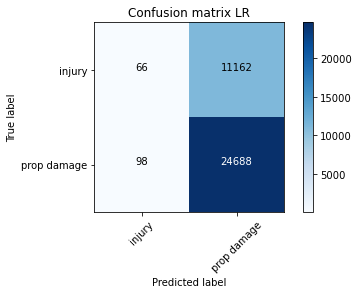

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[2,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury','prop damage'],normalize= False,  title='Confusion matrix LR')

In [60]:
print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81     24786
           2       0.40      0.01      0.01     11228

   micro avg       0.69      0.69      0.69     36014
   macro avg       0.55      0.50      0.41     36014
weighted avg       0.60      0.69      0.56     36014



Looking at those results, we could say that LR is predicting well when it comes to predicting prop damage, but not so well when predicitng injury.

In [61]:
log_loss(y_test, yhat_lr_prob)

0.6140519017648521

Logloss is also not very comforting to use this model. Let's see some other classification models.  

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

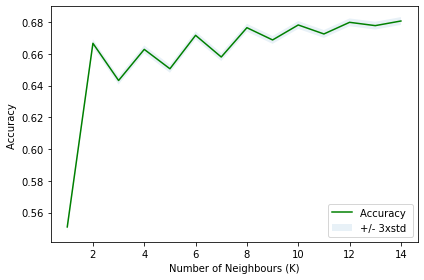

In [144]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [65]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6765424557116677 with k= 8


In [106]:
k=13
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn=neigh.predict(X_test)

Confusion matrix, without normalization
[[ 1396  9832]
 [ 1770 23016]]


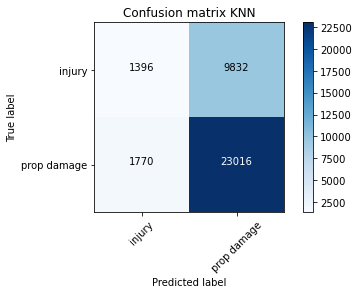

In [107]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[2,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury','prop damage'],normalize= False,  title='Confusion matrix KNN')

In [108]:
print(confusion_matrix(y_test, yhat_knn, labels=[2,1]))

[[ 1396  9832]
 [ 1770 23016]]


In [109]:
trainScores_knn={}
trainScores_knn['SVM-jaccard']=jaccard_similarity_score(y_test, yhat_knn)
trainScores_knn['SVM-f1-score']=f1_score(y_test, yhat_knn, average='weighted')
trainScores_knn

{'SVM-jaccard': 0.6778475037485422, 'SVM-f1-score': 0.6101613675023041}

In [110]:
print (classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           1       0.70      0.93      0.80     24786
           2       0.44      0.12      0.19     11228

   micro avg       0.68      0.68      0.68     36014
   macro avg       0.57      0.53      0.50     36014
weighted avg       0.62      0.68      0.61     36014



we can see that knn is slightly better in predicting injury label than logistic regression.

# Support Vector Machine

In [70]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
yhat_svm = clf.predict(X_test)

In [72]:
trainScores_svm={}
trainScores_svm['SVM-jaccard']=jaccard_similarity_score(y_test, yhat_svm)
trainScores_svm['SVM-f1-score']=f1_score(y_test, yhat_svm, average='weighted')
trainScores_svm

{'SVM-jaccard': 0.6883989559615705, 'SVM-f1-score': 0.564012356396813}

Confusion matrix, without normalization
[[   55 11173]
 [   49 24737]]


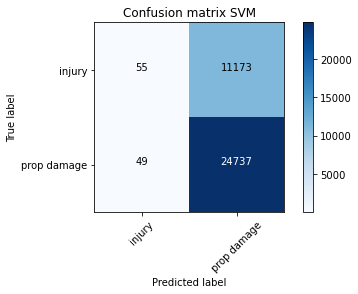

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[2,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury','prop damage'],normalize= False,  title='Confusion matrix SVM')

In [111]:
print (classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           1       0.69      1.00      0.82     24786
           2       0.53      0.00      0.01     11228

   micro avg       0.69      0.69      0.69     36014
   macro avg       0.61      0.50      0.41     36014
weighted avg       0.64      0.69      0.56     36014



In [112]:
f1_score_knn = round(f1_score(y_test, yhat_knn, average='weighted'),2)
f1_score_svm = round(f1_score(y_test, yhat_svm, average='weighted'),2)
f1_score_lr = round(f1_score(y_test, yhat_lr, average='weighted'),2) 

In [113]:
jaccard_knn = round(jaccard_similarity_score(y_test, yhat_knn),2)
jaccard_svm = round(jaccard_similarity_score(y_test, yhat_svm),2)
jaccard_lr = round(jaccard_similarity_score(y_test, yhat_lr),2)

In [114]:
d = {'Jaccard' : pd.Series([jaccard_knn, jaccard_svm, jaccard_lr], index =['KNN',  'SVM', 'LogisticRegression']), 
     'F1-score' : pd.Series([f1_score_knn, f1_score_svm, f1_score_lr], index =['KNN', 'SVM', 'LogisticRegression']),
     }
Report = pd.DataFrame(d) 
Report

,Jaccard,F1-score
KNN,0.68,0.61
SVM,0.69,0.56
LogisticRegression,0.69,0.56
